In [80]:
#import the required libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import scipy.stats as stats

In [6]:
#load the data 
survey = pd.read_csv("Survey.csv")

In [7]:
#display the top 5 rows of data from the dataset
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [8]:
#to obtain the survey info
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).

Part I

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major
2.1.2. Gender and Grad Intention
2.1.3. Gender and Employment
2.1.4. Gender and Computer

In [10]:
#Answer 2.1.1: to get the contingency table for Gender(row variable) and Major
survey_gen_maj = pd.crosstab(survey.Gender, survey.Major,margins=True)
survey_gen_maj

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [11]:
#Answer 2.1.2: to get the contingency table for Gender(row variable) and Grad Intention
survey_gen_grIn = pd.crosstab(survey['Gender'], survey['Grad Intention'],margins=True)
survey_gen_grIn

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [12]:
#Answer 2.1.3: to get the contingency table for Gender(row variable) and Employment
survey_gen_emp = pd.crosstab(survey.Gender, survey.Employment,margins=True)
survey_gen_emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [13]:
#Answer 2.1.4: to get the contingency table for Gender(row variable) and Computer
survey_gen_comp = pd.crosstab(survey.Gender, survey.Computer,margins=True)
survey_gen_comp

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

2.2.1. What is the probability that a randomly selected CMSU student will be male?
What is the probability that a randomly selected CMSU student will be female?

Answer 2.2.1. The probability of randomly selecting a male CMSU student is P(Male student)= 29/62 = 0.4677.
The probability of the randomly selected CMSU student being female is P(Female student) = 33/62 = 0.5323 
(or) it can be calculated as P(Female student) = 1-P(Male student) = 1-0.4677 = 0.5323

2.2.2. Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

Answer 2.2.2: The conditional probability of different majors among male students in CMSU is--

a) Conditional probability of accounting major among male students in CMSU is 4/29 = 0.138
b) Conditional probability of CIS major among male students in CMSU is 1/29 = 0.0345
c) Conditional probability of Economics/Finance major among male students in CMSU is 4/29 = 0.138
d) Conditional probability of International Business major among male students in CMSU is 2/29 = 0.069
e) Conditional probability of Management major among male students in CMSU is 6/29 = 0.207
f) Conditional probability of Other major among male students in CMSU is 4/29 = 0.138
g) Conditional probability of Retailing/Marketing major among male students in CMSU is 5/29 = 0.172 

The conditional probability of different majors among female students in CMSU is--

a) Conditional probability of accounting major among female students in CMSU is 3/33 = 0.091
b) Conditional probability of CIS major among female students in CMSU is 3/33 = 0.091
c) Conditional probability of Economics/Finance major among female students in CMSU is 7/33 = 0.212
d) Conditional probability of International Business major among female students in CMSU is 4/33 = 0.121
e) Conditional probability of Management major among female students in CMSU is 4/33 = 0.121
f) Conditional probability of Other major among female students in CMSU is 3/33 = 0.091
g) Conditional probability of Retailing/Marketing major among female students in CMSU is 9/33 = 0.272

The male and female students with undecided major are not used to calculate the conditional probability as they have no major yet.

2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
Find the conditional probability of intent to graduate, given that the student is a female.

Answer 2.2.3: The conditional probability of intent to graduate, give the student is male is P(Intent to Graduate|Male) = P(Intent to Graduate and Male)/P(Male) = 17/29 = 0.586
The conditional probability of intent to graduate, given that the student is a female is P(Intent to Graduate|Female) = P(Intent to Graduate and Female)/P(Female) = 11/33 = 0.333

2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

Answer 2.2.4: The conditional probability of employment status for male students is--

a) The conditional probability of full-time employed given male students is P(Fulltime|Male) = 7/29 = 0.241
b) The conditional probability of part-time employed given male students is P(Parttime|Male) = 19/29 = 0.655
c) The conditional probability of unemployed given male students is P(Unemployed|Male) = 3/29 = 0.103
d) The conditional probability of employed given male students is P(Employed|Male) = (1- P(Unemployed|Male)) 
= (1-(3/29)) = 26/29 = 0.897

as well as the conditional probability of employement status for the female students is as follows--

a) The conditional probability of full-time employed given female students is P(Fulltime|Female) = 3/33 = 0.091
b) The conditional probability of part-time employed given female students is P(Parttime|Female) = 24/33 = 0.727
c) The conditional probability of unemployed given female students is P(Unemployed|Female) = 6/33 = 0.182
d) The conditional probability of employed given female students is P(Employed|Female) = (1-P(Unemployed|Female))= (1-(6/33))= 27/33 = 0.818
    
2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.


In [34]:
#Answer 2.2.5: 
# a) The conditional probability of laptop preference among the male students is P(laptop|male) = P(laptop and male|male)=
print(survey_gen_comp.loc[['Male'],:]/29)
#as shown below, 26/29 =  0.897 is the answer.

Computer   Desktop    Laptop  Tablet  All
Gender                                   
Male      0.103448  0.896552     0.0  1.0


In [35]:
# b) The conditional probability of laptop preference among the female students is P(laptop|female) = P(laptop and female|female)=

total_female = survey_gen_comp.loc['Female','All']
#print(total_female)
print(survey_gen_comp.loc[['Female'],:]/total_female)
#as shown below, the answer is 29/33 = 0.879

Computer   Desktop    Laptop    Tablet  All
Gender                                     
Female    0.060606  0.878788  0.060606  1.0


2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?
Justify your comment in each case.

Answer 2.3: Based on the above probabilities, the column variable in each case is not independent of Gender. As we know, conditional probability is calculated using P(A|B), A and B are said to be independent when P(A|B) = P(B). Because, if A and B are independent, then P(A and B) = P(A)*P(B), but as P(A|B) = (P(A)*P(B))/P(B)= P(A), considering the Bayes theorem for independent events.

Let us check for each of the above cases to prove--

regarding 2.2.2: To check if conditional probability of different majors is based on gender:::: Initially, calculating the probability of each major, P(Accounting) = 7/62 = 0.113.  Whereas, conditional probabilities for the major given the gender, P(Accounting|Male)=0.138 and P(Accounting|Female)=0.091 are not equal to P(Accounting).
Similarly, P(CIS)= 4/62 = 0.065, P(Economics/Finance)= 11/62 = 0.177, P(International Business)= 6/62 = 0.097, P(Management)= 10/62 = 0.161, P(Other)= 7/62 = 0.113, P(Retailing/Marketing)= 14/62 = 0.226

In [47]:
total_male= survey_gen_maj.loc['Male','All']
#print(total_male)
print(survey_gen_maj.loc[['Male'],:]/total_male)
#The following is the display of conditional probabilites of different majors for male students--

Major   Accounting       CIS  Economics/Finance  International Business  \
Gender                                                                    
Male      0.137931  0.034483           0.137931                0.068966   

Major   Management     Other  Retailing/Marketing  Undecided  All  
Gender                                                             
Male      0.206897  0.137931             0.172414   0.103448  1.0  


In [49]:
total_female= survey_gen_maj.loc['Female','All']
#print(total_female)
print(survey_gen_maj.loc[['Female'],:]/total_female)

Major   Accounting       CIS  Economics/Finance  International Business  \
Gender                                                                    
Female    0.090909  0.090909           0.212121                0.121212   

Major   Management     Other  Retailing/Marketing  Undecided  All  
Gender                                                             
Female    0.121212  0.090909             0.272727        0.0  1.0  


The above is the display of conditional probabilites of different majors for female students. As we can compare with the probabilities of each major that are calculated above and the conditional probabilities of different majors for given gender, none of them match. Hence, different majors are not independent of Gender.

regarding 2.2.3: To check if conditional probability of intent to graduate is based on gender:::: Initially, calculating the probability of differnt intent to graduate, P(intent to graduate) = 28/62 = 0.452 and P(no intent to graduate) = 12/62 = 0.194. The following are the conditional probabilities for intent to graduate given male student--

In [50]:
print(survey_gen_grIn.loc[['Male'],:]/total_male)

Grad Intention        No  Undecided       Yes  All
Gender                                            
Male            0.103448   0.310345  0.586207  1.0


In [51]:
#The following are the conditional probabilities for intent to graduate if the student is female--
print(survey_gen_grIn.loc[['Female'],:]/total_female)

Grad Intention        No  Undecided       Yes  All
Gender                                            
Female          0.272727   0.393939  0.333333  1.0


As we can see above, the intent to graduate is also not independent of gender (since, P(intent to graduate) is not equal to P(intent to graduate|Male) and P(intent to graduate) is not equal to P(intent to graduate|Female) and similarly for no intent to graduate also).

regarding 2.2.4: To check if the conditional probability of employment status is based on gender or not:::
Firstly, to calculate the probability of different employment statuses, P(Full-time)= 10/62 = 0.161, P(Part-time)= 43/62 = 0.694, P(Unemployed) = 9/62 = 0.145, P(Employed)=1-P(Unemployed) = (1-0.145) = 0.855. Now to calculate the conditional probability of employment status if it is a male student--

In [54]:
print(survey_gen_emp.loc[['Male'],:]/total_male)

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Male         0.241379   0.655172    0.103448  1.0


In [55]:
#similarly, the following is the conditional probability of various employment statuses given it is female student--
print(survey_gen_emp.loc[['Female'],:]/total_female)

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female       0.090909   0.727273    0.181818  1.0


As we can see from the above probabilities, the employment status is dependent of gender. 

Regarding 2.2.5: To check if the conditional probability of laptop preference based on the gender or not:::
Firstly, to get the probability of laptop preferences-- P(Desktop) = 5/62 = 0.081, P(Laptop) = 55/62 = 0.887 and
P(Tablet) = 2/62= 0.032. Now to calculate the conditional probability of laptop preference given a male student--

In [56]:
print(survey_gen_comp.loc[['Male'],:]/total_male)

Computer   Desktop    Laptop  Tablet  All
Gender                                   
Male      0.103448  0.896552     0.0  1.0


In [57]:
#to obtain the conditional probability of laptop preferences given a female student--
print(survey_gen_comp.loc[['Female'],:]/total_female)

Computer   Desktop    Laptop    Tablet  All
Gender                                     
Female    0.060606  0.878788  0.060606  1.0


P(Desktop) is not equal to P(Desktop|Male) or P(Desktop|Female) and similarly, for other laptop-preferences as well. As we can observe, the probabilities of the laptop preferences are not independent of gender.

Hence we can prove that, the column variable in each case is not independent of Gender.

Part II

2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions.
[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

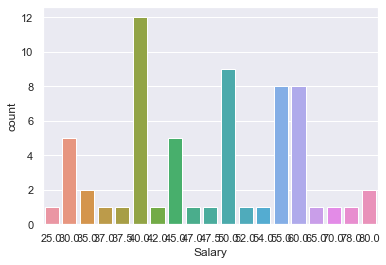

In [62]:
sns.countplot(survey['Salary'])

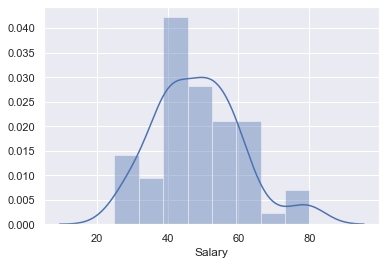

In [64]:
sns.distplot(survey['Salary'])

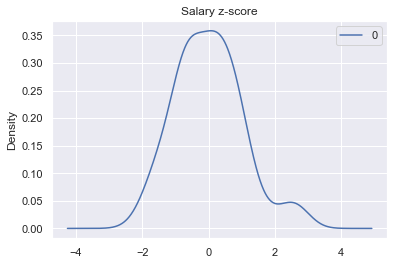

In [102]:
z_score=stats.zscore(survey['Salary'])
#z_score
survey_Zscore = pd.DataFrame(z_score)
survey_Zscore.plot.kde()
plt.title("Salary z-score")
plt.show()

In [103]:
#to obtain the various details of the dataset
survey.describe(include='all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


In [111]:
#to calculate the probability of values that fall under the normal distribution range (min to max)
#survey['Salary'].max()
stats.norm.cdf(survey['Salary'].max(),loc=survey['Salary'].mean(),scale=survey['Salary'].std()) - stats.norm.cdf(survey['Salary'].min(),loc=survey['Salary'].mean(),scale=survey['Salary'].std())

0.9697505518014508

The above z-score distribution of Salary variable shows that it is normally distributed, as 96.98% of the values fall under this distribution.

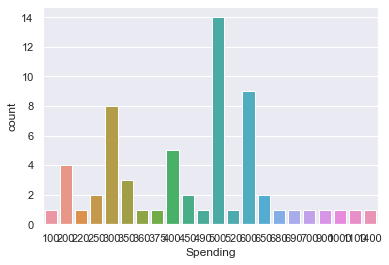

In [43]:
sns.countplot(survey['Spending'])

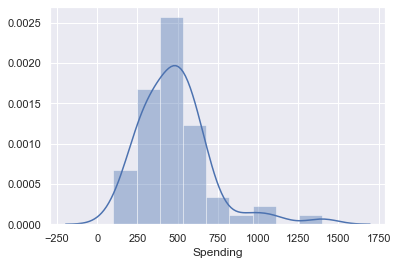

In [113]:
#to obtain the histogram with kernel distribution for 'Spending' column of the dataset
sns.distplot(survey['Spending'])
plt.show()

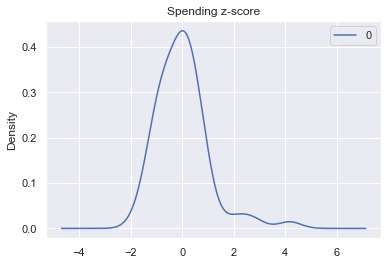

In [114]:
#as histograms dont always indicate the distribution is symmetric, we will obtain the z-scores and plot them
spending_zscore=pd.DataFrame(stats.zscore(survey.Spending))
spending_zscore.plot.kde()
plt.title('Spending z-score')
plt.show()

In [116]:
#to get the probability of values that fall in the normal distribution range (between max and min)
stats.norm.cdf(survey.Spending.max(),loc=survey.Spending.mean(),scale=survey.Spending.std())-stats.norm.cdf(survey.Spending.min(),loc=survey.Spending.mean(),scale=survey.Spending.std())

0.9573706573563489

As it shows that 95.7% of the values of the Spending variable fall under the z-score normal distribution between the max and min values, it is a normal distribution.

The following shows the distribution of 'Text Messages' variable in the given dataset--

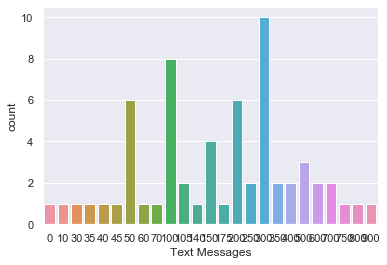

In [44]:
sns.countplot(survey['Text Messages'])

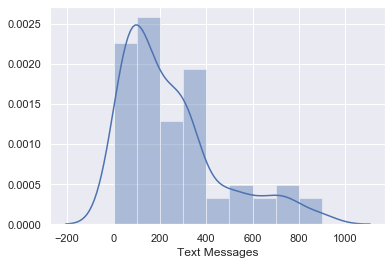

In [124]:
#to obtain the histogram with the kernel density
sns.distplot(survey['Text Messages'])
plt.show()

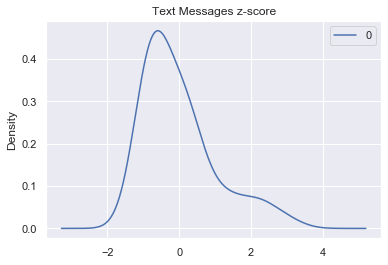

In [125]:
#to obtain the z-scores and plot their distribution
txtMsgs_zscore=pd.DataFrame(stats.zscore(survey['Text Messages']))
txtMsgs_zscore.plot.kde()
plt.title('Text Messages z-score')
plt.show()

In [126]:
#to get the probability of 'Text Messages' values that fall in the normal distribution range (between max and min)
stats.norm.cdf(survey['Text Messages'].max(),loc=survey['Text Messages'].mean(),scale=survey['Text Messages'].std())-stats.norm.cdf(survey['Text Messages'].min(),loc=survey['Text Messages'].mean(),scale=survey['Text Messages'].std())

0.8733682831718741

The above shows that nearly 87.34% of the values fall under the normal-distribution for the 'Text Messages' variable.

From the above plots of distribution and the z-scores, we can see that the data is normally-distributed based on the z-score distributions and the percentage of data that falls under the normal distribution.